In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings='ignore'
from sklearn.cluster import KMeans
import os

import math
%matplotlib inline

In [2]:
xls = pd.ExcelFile('/Users/macos/Desktop/student crisis/Long_empl_household_dynamics/colorado_pseo_co.xlsx')
df1 = pd.read_excel(xls, 'Earnings')
df2 = pd.read_excel(xls, 'Flows')

In [3]:
earnings=df1.copy()
flows=df2.copy()

In [4]:
earnings.head(2)

,agg_level_pseo,label_agg_level_pseo,inst_level,institution,label_institution,degree_level,label_degree_level,cip_level,cipcode,label_cipcode,...,y1_ipeds_count,y5_ipeds_count,y10_ipeds_count,status_ipeds_count,status_y1_earnings,status_y1_grads_earn,status_y5_earnings,status_y5_grads_earn,status_y10_earnings,status_y10_grads_earn
0,38,Degree Level * Institution\nID,I,1345,ADAMS STATE\nCOLLEGE,3,Associates,A,00,All Instructional Programs,...,886,253,126,1,1,1,1,1,1,1
1,38,Degree Level * Institution\nID,I,1345,ADAMS STATE\nCOLLEGE,5,Baccalaureate,A,00,All Instructional Programs,...,4786,3629,1742,1,1,1,1,1,1,1


In [5]:
flows.head(5)

,agg_level_pseo,label_agg_level_pseo,inst_level,institution,label_institution,degree_level,label_degree_level,cip_level,cipcode,label_cipcode,...,y5_grads_emp,y5_grads_emp_instate,y10_grads_emp,y10_grads_emp_instate,status_y1_grads_emp,status_y1_grads_emp_instate,status_y5_grads_emp,status_y5_grads_emp_instate,status_y10_grads_emp,status_y10_grads_emp_instate
0,38,Degree Level * Institution ID,I,1345,ADAMS STATE\nCOLLEGE,3,Associates,A,0,All Instructional Programs,...,321,78,80,31,1,1,1,1,1,1
1,38,Degree Level * Institution ID,I,1345,ADAMS STATE\nCOLLEGE,5,Baccalaureate,A,0,All Instructional Programs,...,3691,1505,1604,750,1,1,1,1,1,1
2,38,Degree Level * Institution ID,I,1345,ADAMS STATE\nCOLLEGE,7,Masters,A,0,All Instructional Programs,...,2124,1470,1089,699,1,1,1,1,1,1
3,38,Degree Level * Institution ID,I,1346,ARAPAHOE\nCOMMUNITY\nCOLLEGE,1,Certificate < 1 year,A,0,All Instructional Programs,...,3259,1594,931,411,1,1,1,1,1,1
4,38,Degree Level * Institution ID,I,1346,ARAPAHOE\nCOMMUNITY\nCOLLEGE,2,Certificate 1-2 years,A,0,All Instructional Programs,...,1496,907,763,430,1,1,1,1,1,1


In [6]:
earnings.shape

(7879, 41)

In [7]:
flows.shape

(101412, 31)

In [25]:
earnings.dtypes

agg_level_pseo             int64
label_agg_level_pseo      object
inst_level                object
institution                int64
label_institution         object
degree_level               int64
label_degree_level        object
cip_level                 object
cipcode                   object
label_cipcode             object
grad_cohort                int64
label_grad_cohort         object
grad_cohort_years          int64
geo_level                 object
geography                  int64
label_geography           object
ind_level                 object
industry                   int64
label_industry            object
y1_p25_earnings          float64
y1_p50_earnings          float64
y1_p75_earnings          float64
y1_grads_earn            float64
y5_p25_earnings          float64
y5_p50_earnings          float64
y5_p75_earnings          float64
y5_grads_earn             object
y10_p25_earnings         float64
y10_p50_earnings         float64
y10_p75_earnings         float64
y10_grads_

In [26]:
flows.columns

Index(['agg_level_pseo', 'label_agg_level_pseo', 'inst_level', 'institution',
       'label_institution', 'degree_level', 'label_degree_level', 'cip_level',
       'cipcode', 'label_cipcode', 'grad_cohort', 'label_grad_cohort',
       'grad_cohort_years', 'geo_level', 'geography', 'label_geography',
       'ind_level', 'Industry\nSector', 'label_industry', 'y1_grads_emp',
       'y1_grads_emp_instate', 'y5_grads_emp', 'y5_grads_emp_instate',
       'y10_grads_emp', 'y10_grads_emp_instate', 'status_y1_grads_emp',
       'status_y1_grads_emp_instate', 'status_y5_grads_emp',
       'status_y5_grads_emp_instate', 'status_y10_grads_emp',
       'status_y10_grads_emp_instate'],
      dtype='object')

In [27]:
# flows['y1_grads_emp']=flows.y1_grads_emp.astype(float)
flows["y1_grads_emp"] = pd.to_numeric(flows.y1_grads_emp, errors='coerce')
flows["y5_grads_emp"] = pd.to_numeric(flows.y5_grads_emp, errors='coerce')
flows["y10_grads_emp"] = pd.to_numeric(flows.y10_grads_emp, errors='coerce')
flows["y1_grads_emp_instate"] = pd.to_numeric(flows.y1_grads_emp_instate, errors='coerce')
flows["y5_grads_emp_instate"] = pd.to_numeric(flows.y5_grads_emp_instate, errors='coerce')
flows["y10_grads_emp_instate"] = pd.to_numeric(flows.y10_grads_emp, errors='coerce')



In [28]:
earnings.columns

Index(['agg_level_pseo', 'label_agg_level_pseo', 'inst_level', 'institution',
       'label_institution', 'degree_level', 'label_degree_level', 'cip_level',
       'cipcode', 'label_cipcode', 'grad_cohort', 'label_grad_cohort',
       'grad_cohort_years', 'geo_level', 'geography', 'label_geography',
       'ind_level', 'industry', 'label_industry', 'y1_p25_earnings',
       'y1_p50_earnings', 'y1_p75_earnings', 'y1_grads_earn',
       'y5_p25_earnings', 'y5_p50_earnings', 'y5_p75_earnings',
       'y5_grads_earn', 'y10_p25_earnings', 'y10_p50_earnings',
       'y10_p75_earnings', 'y10_grads_earn', 'y1_ipeds_count',
       'y5_ipeds_count', 'y10_ipeds_count', 'status_ipeds_count',
       'status_y1_earnings', 'status_y1_grads_earn', 'status_y5_earnings',
       'status_y5_grads_earn', 'status_y10_earnings', 'status_y10_grads_earn'],
      dtype='object')

In [29]:
earnings["y1_p25_earnings"] = pd.to_numeric(earnings.y1_p25_earnings, errors='coerce')
earnings["y1_p50_earnings"] = pd.to_numeric(earnings.y1_p50_earnings, errors='coerce')
earnings["y1_p75_earnings"] = pd.to_numeric(earnings.y1_p75_earnings, errors='coerce')
earnings["y1_grads_earn"] = pd.to_numeric(earnings.y1_grads_earn, errors='coerce')
earnings["y5_p25_earnings"] = pd.to_numeric(earnings.y5_p25_earnings, errors='coerce')
earnings["y5_p50_earnings"] = pd.to_numeric(earnings.y5_p50_earnings, errors='coerce')
earnings["y5_p75_earnings"] = pd.to_numeric(earnings.y5_p75_earnings, errors='coerce')
earnings["y10_p25_earnings"] = pd.to_numeric(earnings.y10_p25_earnings, errors='coerce')
earnings["y10_p50_earnings"] = pd.to_numeric(earnings.y10_p50_earnings, errors='coerce')
earnings["y10_p75_earnings"] = pd.to_numeric(earnings.y10_p75_earnings, errors='coerce')
earnings["y1_ipeds_count"] = pd.to_numeric(earnings.y1_ipeds_count, errors='coerce')
earnings["y5_ipeds_count"] = pd.to_numeric(earnings.y5_ipeds_count, errors='coerce')
earnings["y10_ipeds_count"] = pd.to_numeric(earnings.y10_ipeds_count, errors='coerce')


In [13]:
# earnings.dropna()

In [14]:
earnings['y5_p25_earnings']=pd.to_numeric(earnings.y5_p25_earnings, errors='coerce')

In [15]:
# top ranked institution customers based on the mean of the  graduates employed in year 1
earn_in1=earnings.groupby('label_institution')
earn_y1=earn_in1['y1_p25_earnings'].mean().sort_values(ascending=False)
earn_y1.head(10)

label_institution
COLORADO SCHOOL\nOF MINES                     48797.734694
COLORADO STATE\nUNIVERSITY - GLOBAL\nCAMPU    39950.843750
UNIVERSITY OF\nCOLORADO DENVER                34145.532819
UNIV OF COLORADO AT\nCOLO SPRINGS             30190.878049
UNIVERSITY OF\nCOLORADO-BOULDER               29023.101990
COLORADO STATE\nUNIVERSITY                    28365.443418
ARAPAHOE\nCOMMUNITY COLLEGE                   28212.398496
COMMUNITY COLLEGE\nOF AURORA                  28107.823529
RED ROCKS\nCOMMUNITY COLLEGE                  26672.481203
EMILY GRIFFITH\nTECHNICAL COLLEGE             25717.976190
Name: y1_p25_earnings, dtype: float64

In [30]:
# top ranked institution customers based on the mean of the  graduates employed in year 1
earn_in5=earnings.groupby('label_institution')
earn_y5=earn_in1['y5_p25_earnings'].mean().sort_values(ascending=False)
earn_y5.head(10)

label_institution
COLORADO SCHOOL\nOF MINES                     69260.706667
COLORADO STATE\nUNIVERSITY - GLOBAL\nCAMPU    49899.500000
UNIVERSITY OF\nCOLORADO DENVER                43918.840580
UNIVERSITY OF\nCOLORADO-BOULDER               41307.929878
UNIV OF COLORADO AT\nCOLO SPRINGS             39949.200000
COLORADO STATE\nUNIVERSITY                    39740.045714
RED ROCKS\nCOMMUNITY COLLEGE                  34280.083333
UNIVERSITY OF\nNORTHERN\nCOLORADO             34261.300518
METROPOLITAN STATE\nUNIVERSITY OF\nDENVER     34108.513089
ARAPAHOE\nCOMMUNITY COLLEGE                   34072.034091
Name: y5_p25_earnings, dtype: float64

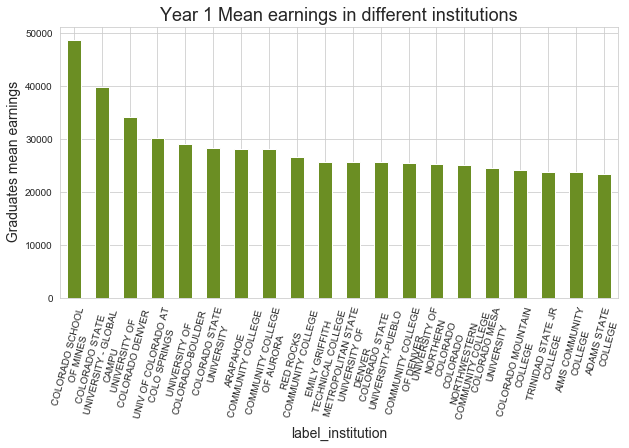

In [17]:
plt.figure(figsize=(10,5))
earn_y1.head(-10).plot.bar(color='olivedrab')
plt.title("Year 1 Mean earnings in different institutions", fontsize=18)
plt.xticks(rotation=75)
plt.xlabel("label_institution", fontsize=14)
plt.ylabel(" Graduates mean earnings", fontsize=14)
plt.show()

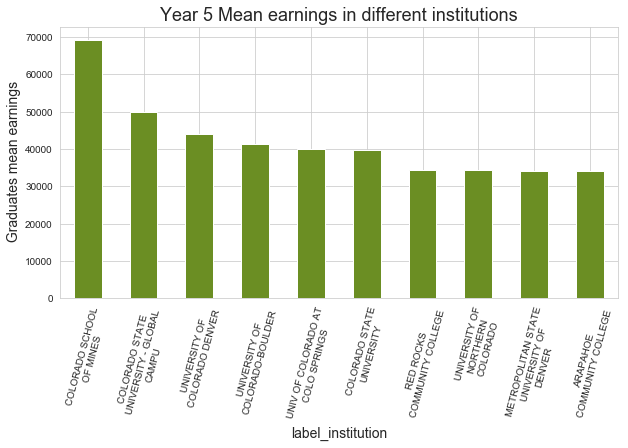

In [18]:
plt.figure(figsize=(10,5))
earn_y5.head(10).plot.bar(color='olivedrab')
plt.title("Year 5 Mean earnings in different institutions", fontsize=18)
plt.xticks(rotation=75)
plt.xlabel("label_institution", fontsize=14)
plt.ylabel(" Graduates mean earnings", fontsize=14)
plt.show()

In [19]:
top_earn_ins= earnings[earnings['label_institution'] == 'COLORADO SCHOOL\nOF MINES'].groupby('label_cipcode')['y1_p25_earnings'].mean().sort_values(ascending=False)
top_earn_ins.head(10)

label_cipcode
Petroleum Engineering                                                                   73529.833333
Mining and Mineral Engineering                                                          58393.000000
Engineering Technologies and\nEngineering-Related Fields\n(Consolidated 15.00-15.99)    57605.250000
Engineering (Consolidated 14.01-14.99)                                                  56548.000000
Mathematics and Statistics\n(Consolidated 27.01-27.99)                                  56487.000000
Metallurgical Engineering                                                               51044.833333
Chemical Engineering                                                                    50668.000000
All Instructional Programs                                                              50611.214286
Social Sciences (Consolidated\n45.01-45.99)                                             50259.250000
Biomedical/Medical Engineering                                               

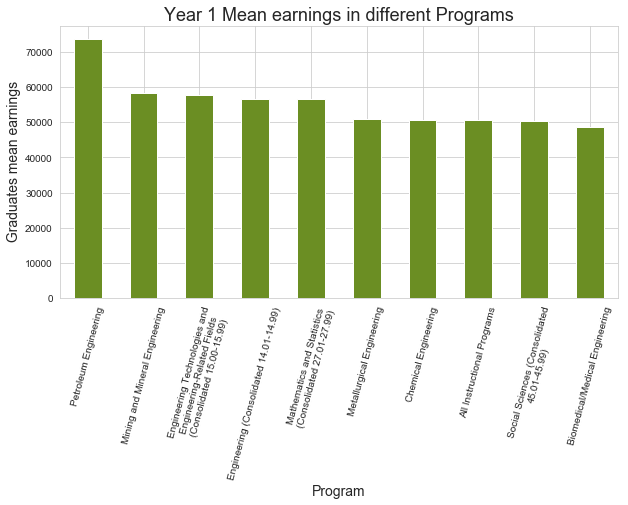

In [20]:
plt.figure(figsize=(10,5))
top_earn_ins.head(10).plot.bar(color='olivedrab')
plt.title("Year 1 Mean earnings in different Programs", fontsize=18)
plt.xticks(rotation=75)
plt.xlabel("Program", fontsize=14)
plt.ylabel(" Graduates mean earnings", fontsize=14)
plt.show()

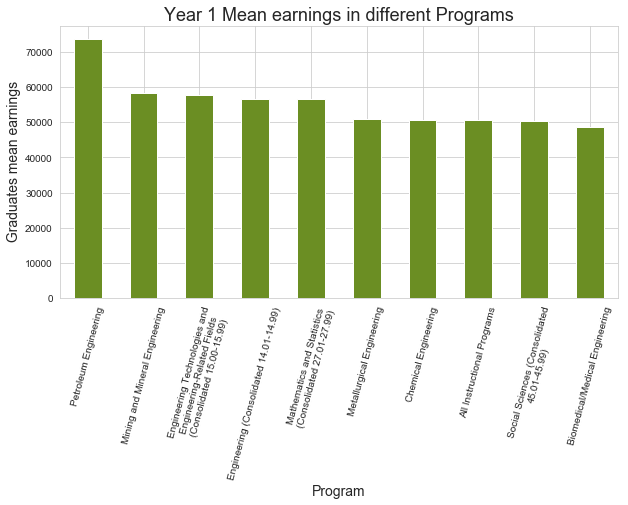

In [21]:
plt.figure(figsize=(10,5))
top_earn_ins.head(10).plot.bar(color='olivedrab')
plt.title("Year 1 Mean earnings in different Programs", fontsize=18)
plt.xticks(rotation=75)
plt.xlabel("Program", fontsize=14)
plt.ylabel(" Graduates mean earnings", fontsize=14)
plt.show()

In [32]:
# top ranked institution customers based on the mean of the  graduates employed in year 1
last=earnings.groupby('label_institution')
earn_y5in=last['y5_p25_earnings'].mean().sort_values(ascending=False)
earn_y5in.head(-10)

label_institution
COLORADO SCHOOL\nOF MINES                     69260.706667
COLORADO STATE\nUNIVERSITY - GLOBAL\nCAMPU    49899.500000
UNIVERSITY OF\nCOLORADO DENVER                43918.840580
UNIVERSITY OF\nCOLORADO-BOULDER               41307.929878
UNIV OF COLORADO AT\nCOLO SPRINGS             39949.200000
COLORADO STATE\nUNIVERSITY                    39740.045714
RED ROCKS\nCOMMUNITY COLLEGE                  34280.083333
UNIVERSITY OF\nNORTHERN\nCOLORADO             34261.300518
METROPOLITAN STATE\nUNIVERSITY OF\nDENVER     34108.513089
ARAPAHOE\nCOMMUNITY COLLEGE                   34072.034091
COLORADO STATE\nUNIVERSITY-PUEBLO             33546.350000
COMMUNITY COLLEGE\nOF AURORA                  33022.078125
COLORADO\nNORTHWESTERN\nCOMMUNITY COLLEGE     32572.592593
COLORADO MESA\nUNIVERSITY                     32280.254098
COMMUNITY COLLEGE\nOF DENVER                  31884.634921
AIMS COMMUNITY\nCOLLEGE                       31416.070707
ADAMS STATE\nCOLLEGE                  

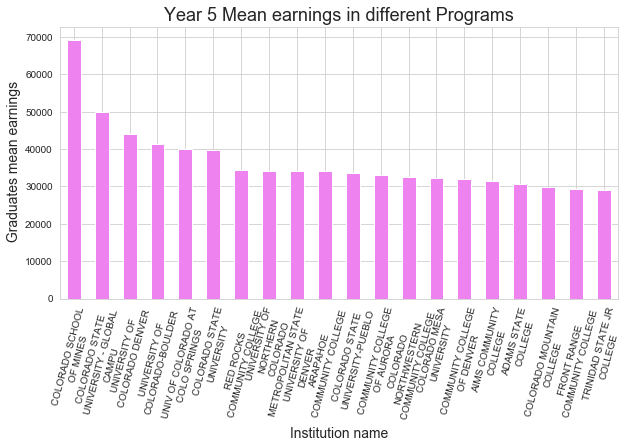

In [34]:
# programs with least mean earnings from institutions with low earnings
plt.figure(figsize=(10,5))
earn_y5in.head(-10).plot.bar(color='violet')
plt.title("Year 5 Mean earnings in different Programs", fontsize=18)
plt.xticks(rotation=75)
plt.xlabel("Institution name", fontsize=14)
plt.ylabel(" Graduates mean earnings", fontsize=14)
plt.show()

In [22]:
last_ins= flows[flows['label_institution'] == 'TRINIDAD STATE JR\nCOLLEGE'].groupby('label_cipcode')['y5_grads_emp'].mean().sort_values(ascending=False)
last_ins.head(-10)

label_cipcode
Liberal Arts and\nSciences, General\nStudies and Humanities    56.296296
Health Professions and\nRelated Programs                       54.753086
All Instructional Programs                                     40.618532
Engineering\nTechnologies and\nEngineering-Related\nFields     16.759259
Personal and Culinary\nServices                                15.577320
Mechanic and Repair\nTechnologies/Technicians                  15.268041
Construction Trades                                            12.988372
Transportation and\nMaterials Moving                           11.744186
Name: y5_grads_emp, dtype: float64

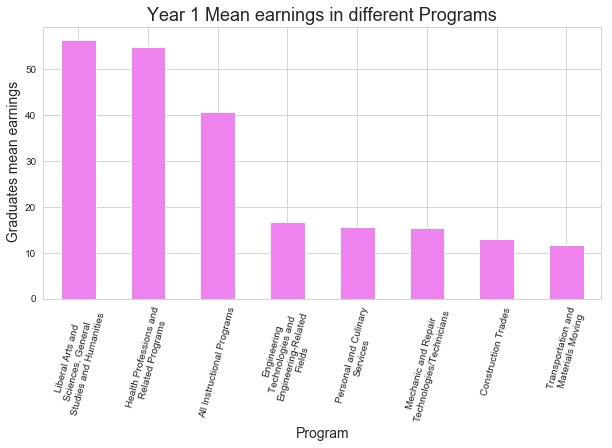

In [23]:
# programs with least mean earnings from institutions with low earnings
plt.figure(figsize=(10,5))
last_ins.head(-10).plot.bar(color='violet')
plt.title("Year 1 Mean earnings in different Programs", fontsize=18)
plt.xticks(rotation=75)
plt.xlabel("Program", fontsize=14)
plt.ylabel(" Graduates mean earnings", fontsize=14)
plt.show()

In [24]:
# Group instiontion to number of graduates employee- YEAR 1
flows_institution_year1=earnings.groupby('label_institution')
flows_y1=flows_institution_year1['status_y1_grads_earn'].mean().sort_values(ascending=False)
flows_y1.head(5)

label_institution
COLORADO\nNORTHWESTERN\nCOMMUNITY COLLEGE    4.285714
LAMAR COMMUNITY\nCOLLEGE                     4.111111
MORGAN COMMUNITY\nCOLLEGE                    4.046512
PICKENS TECHNICAL\nCOLLEGE                   3.991304
TRINIDAD STATE JR\nCOLLEGE                   3.939068
Name: status_y1_grads_earn, dtype: float64